In [1]:
# Lesson 28

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Métodos de evaluación
Por ahora hemos visto que:

Se necesita separar de forma aleatoria en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
Existen diversas métricas para evaluar rendimiento, y elegimos la nuestra según las caracteristicas de nuestro problema
Es útil apoyar la evaluación con visualizaciones de errores, como por ejemplo scatterplots de residuales
Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
Podemos tener pésima performance con esa separación de datos pero no en otros.
Controlar la aleatoridad en train_test_split

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro random_state.

In [4]:
#X = pd.read_csv('../vol/intermediate_results/X_opening.csv')
X = pd.read_csv('https://raw.githubusercontent.com/renemorenow/MachineLearning-Python/master/X.csv',encoding='utf-8',sep=',')
y = X['Worldwide Gross']
X = X.drop('Worldwide Gross',axis=1)

In [13]:
len(X)

5011

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [6]:
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [7]:
pd.DataFrame.equals(X_train,X2_train)

True

Cross Validation:
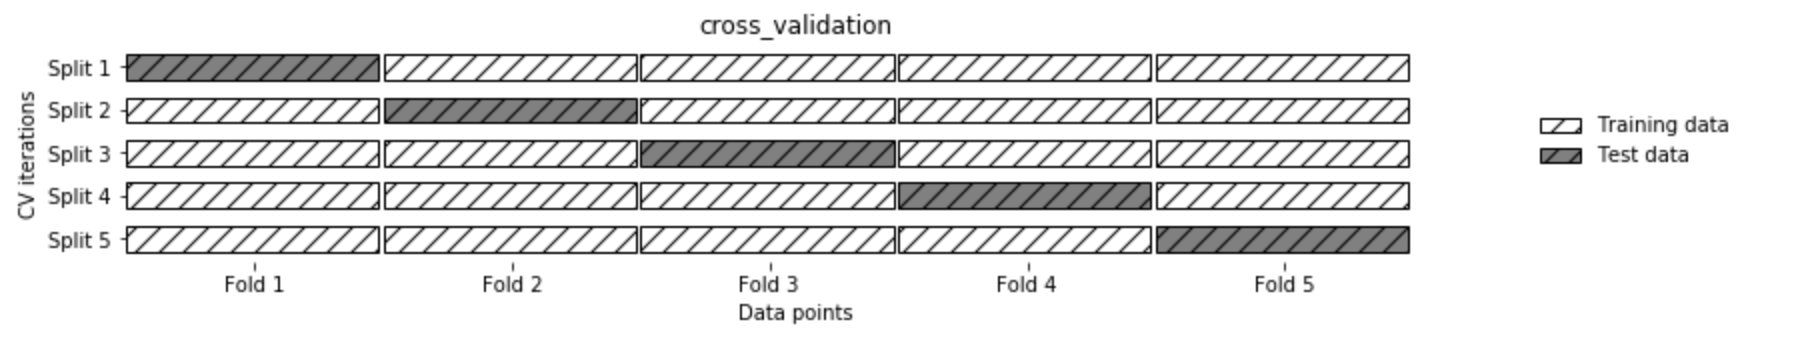

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([ 0.73337097,  0.6882045 ,  0.77862667,  0.75038314, -0.06585894])

In [9]:
scores.mean()

0.5769452665571725

In [10]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.9151253615100765

Selección de modelos
Overfitting o underfitting?

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

In [14]:
#!pip install --upgrade scikit-learn

In [17]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.23620558, 0.18619132, 0.17345333, 0.17023349, 0.18858767]),
 'score_time': array([0.00926995, 0.00617194, 0.00642967, 0.00688004, 0.00403738]),
 'test_score': array([ 0.73337097,  0.6882045 ,  0.77862667,  0.75038314, -0.06585894]),
 'train_score': array([0.84749384, 0.92094428, 0.91260978, 0.90995178, 0.90846896])}

In [21]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8998937282141586
0.5769452665571725


Tenemos bias por lo que buscaremos modelos más complejos.

### Validation Curves y Learning Curves

In [22]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.05955124, 0.04340839, 0.03864312, 0.04165483, 0.03999782]),
 'score_time': array([0.04910779, 0.03545165, 0.03334737, 0.02421951, 0.02000356]),
 'test_score': array([0.49533413, 0.75454848, 0.81783193, 0.85201208, 0.77461215])}

In [23]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.07651615, 0.07295275, 0.072716  , 0.03317499, 0.03999829]),
 'score_time': array([0.06609082, 0.05297995, 0.03933668, 0.0401361 , 0.02400136]),
 'test_score': array([0.43842843, 0.77402353, 0.83247675, 0.80627218, 0.7447979 ])}

In [25]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [26]:
n.shape

(24,)

In [27]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [28]:
np.mean(train_scores,axis=1)

array([0.95583143, 0.93359897, 0.91958636, 0.9119628 , 0.90625502,
       0.90018232, 0.89466782, 0.8896731 , 0.88591483, 0.88317773,
       0.88018324, 0.87738574, 0.87424465, 0.87175856, 0.86872884,
       0.86608609, 0.8636686 , 0.86135152, 0.85912079, 0.85717174,
       0.85464705, 0.85197147, 0.84970346, 0.84791299])

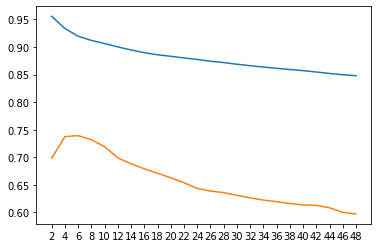

In [29]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);

In [30]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

NameError: name 'KNeighborsRegressor' is not defined

In [31]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])

NameError: name 'samples' is not defined

El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

### Como solucionar el overfitting y el underfitting?

Viarianza Alta:<br/>
 - Conseguir más ejemplos<br/>
 - Reducir cantidad de features<br/>
 - Aumentar coeficiente de regularización

Bias Alto:<br/>
 - Más features<br/>
 - Modelo más complejo

Mal resultado general:<br/>
 - Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset    